In [87]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [88]:
df = pd.read_csv("auto_costs.csv")
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [89]:
df['company']=df['name'].str.split().str.slice(start=0,stop=1).str.join(' ')

In [90]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

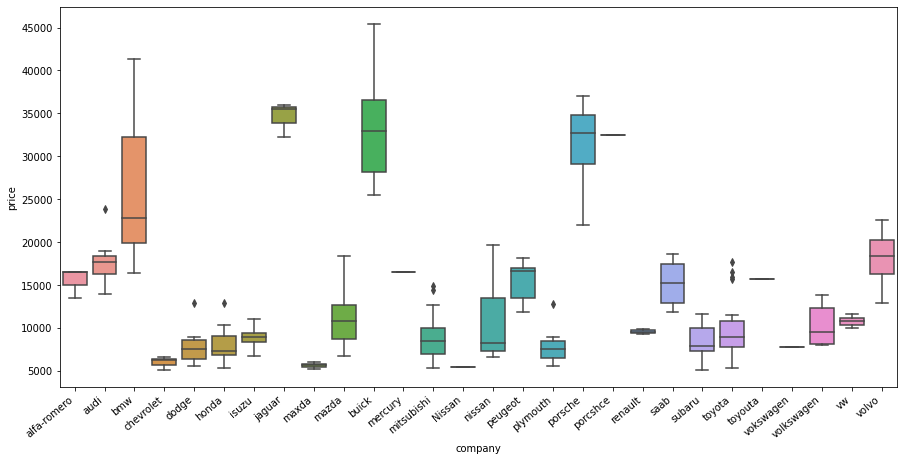

In [91]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

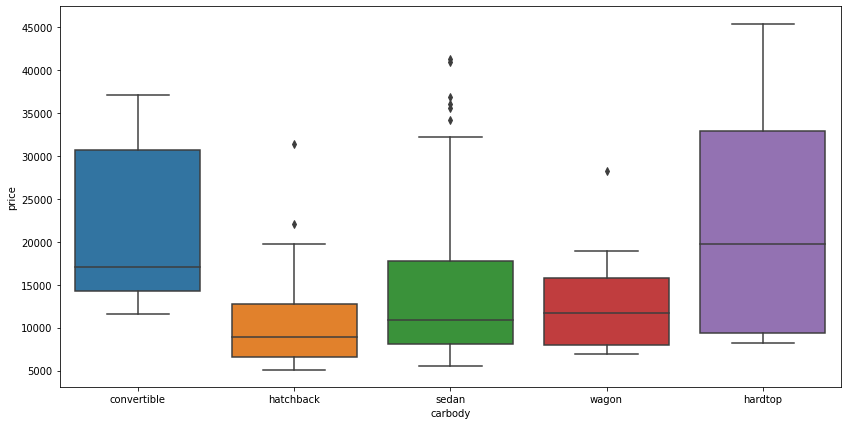

In [92]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='carbody',y='price',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


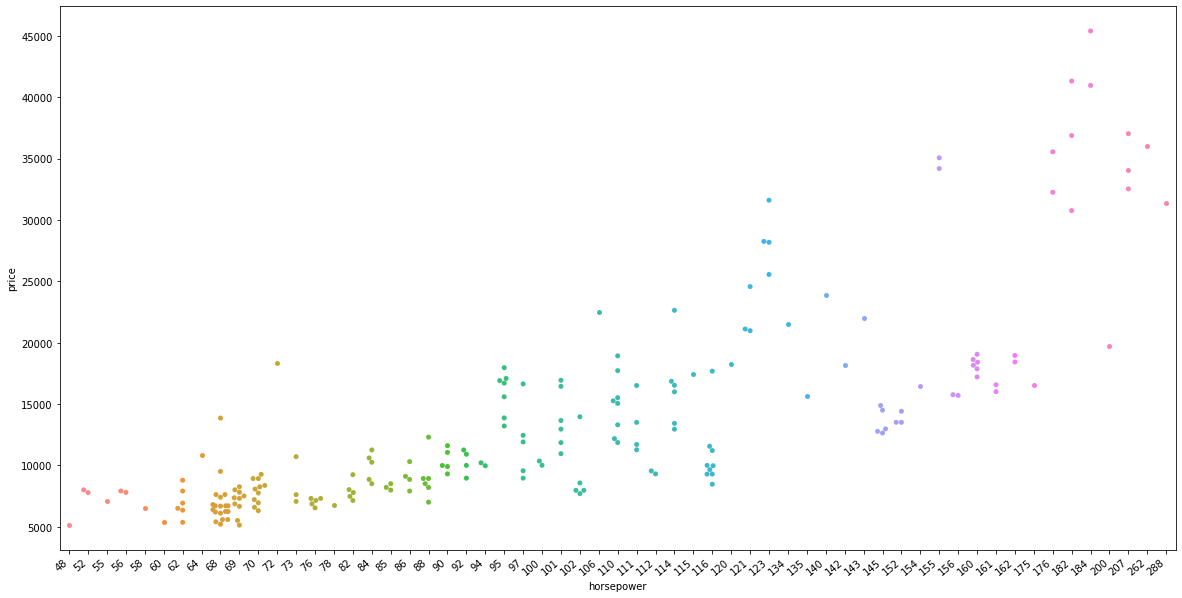

In [93]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='horsepower',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

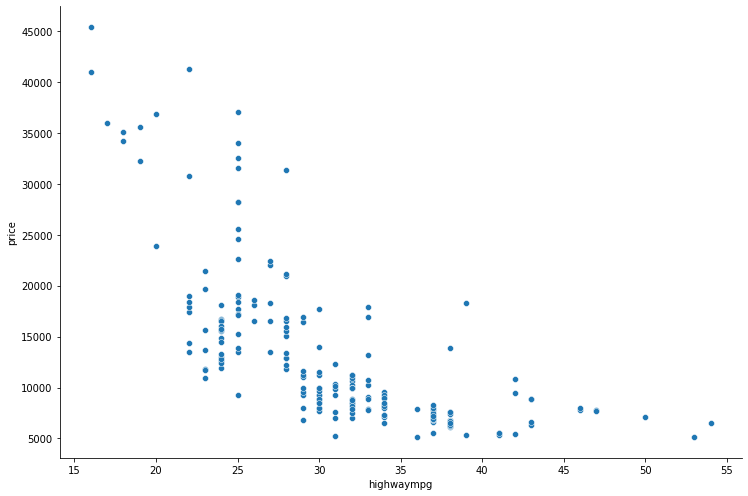

In [94]:
sns.relplot(x='highwaympg',y='price',data=df,height=7,aspect=1.5)

In [119]:
X=df[['carbody','drivewheels','enginelocation','enginesize','carwidth','curbweight','horsepower']]
y = df['price']

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carbody         205 non-null    object 
 1   drivewheels     205 non-null    object 
 2   enginelocation  205 non-null    object 
 3   enginesize      205 non-null    int64  
 4   carwidth        205 non-null    float64
 5   curbweight      205 non-null    int64  
 6   horsepower      205 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.3+ KB


In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

Creating an OneHotEncoder object to contain all the possible categories

In [123]:
ohe=OneHotEncoder()
ohe.fit(X_train[['carbody','drivewheels', 'enginelocation']])

OneHotEncoder()

Creating a column transformer to transform categorical columns

In [124]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['carbody','drivewheels','enginelocation']),
                                    remainder='passthrough')

Linear Regression Model

In [125]:
lr=LinearRegression()
lr

LinearRegression()

Making a pipeline

In [126]:
pipe=make_pipeline(column_trans,lr)

Fitting the model

In [127]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object),
                                                                            array(['4wd', 'fwd', 'rwd'], dtype=object),
                                                                            array(['front', 'rear'], dtype=object)]),
                                                  ['carbody', 'drivewheels',
                                                   'enginelocation'])])),
                ('linearregression', LinearRegression())])

In [128]:
y_pred=pipe.predict(X_test)

Checking R2 Score

In [129]:
r2_score(y_test,y_pred)

0.8125484943440784

In [130]:
data = {'carbody' : 'convertible','enginesize' : 120, 'curbweight' : 1577, 'horsepower' : 200, 'carwidth' : 70, 'drivewheels' : 'fwd', 'enginelocation' : 'rear', 'Model' : 'Malibu'}
test = pd.DataFrame(data= data, index=[1])
test

,carbody,enginesize,curbweight,horsepower,carwidth,drivewheels,enginelocation,Model
1,convertible,120,1577,200,70,fwd,rear,Malibu


In [131]:
price = (pipe.predict(test.iloc[:,:-1]))
name = test.iloc[0, 7]


In [132]:
print(f"Madel : {name}\nPrice : ${price[0]:.2f}")

Madel : Malibu
Price : $33915.88
